1. Understand the problem and read in the data
2. Pre-process data, train-test split
3. Build and compile a deep learning model

# Understand the problem and read in the data

This Kaggle challenge is about predicting the onset of diabetes in 5 years or less. 
Target variable is Outcome. 1 = yes, the person became diabetic in 5 years, and 0 = No, 
the person did not. This is a binary classification problem. Please check out the Kaggle
link here to see feature 
details - https://www.kaggle.com/uciml/pima-indians-diabetes-database/data

In [171]:
#1. Expand the basic code for building a DNN on the Pima Indian Diabetic Dataset to include:
    
    
#(a) pre-process the data by scaling/standardizing the 8 columns (3 marks)

In [172]:
'''Import necessary packages'''
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import train_test_split
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [173]:
%pwd

'/Users/Venkat/Downloads'

In [174]:
!ls

15 SBC $1000 PPO.pdf
15 SBC $2000 PPO (1).pdf
15 SBC $2000 PPO.pdf
15 SBC $500 PPO.pdf
20160623103505597.pdf
2021 WellsFargo Tax Documents
2021 WellsFargo Tax Documents.zip
2022_08_01_14_32_50.pdf
6105_project.ipynb
658c98ab-cffd-448c-80cc-564ab4839f19 (1).pdf
658c98ab-cffd-448c-80cc-564ab4839f19.pdf
6a67adb2-fe02-4fd2-bada-6445c13455fb (1).pdf
6a67adb2-fe02-4fd2-bada-6445c13455fb.pdf
Account-Summary-2022-04-25 07_35_59 UTC.pdf
Apartments.com Rental Application and Reports
Apartments.com Rental Application and Reports.zip
Assignment2_Part1.ipynb
Assignment2_Part2(GradientBoosting).ipynb
Assignment2_Part2(Knn).ipynb
Assignment2_Part2(RandomForest).ipynb
Assignment2_Part3.ipynb
Assignment2_Part4.ipynb
Assignment3_Part1.ipynb
Assignment3_Part2.ipynb
Authority Letter for Collection of Passport.pdf
Breast Cancer Pred Write-up.docx
Breast-Cancer-Prediction-Using-ML-Classification-models-master
Breast-Cancer-Prediction-Using-ML-Classification-models-master.zip
C--Inetpub-wwwroot-SecureMail-Po

In [175]:
path = '/Users/Venkat/Downloads'

In [176]:
df = pd.read_csv(f'{path}/pima-indians-diabetes.data',header = None)
print(df.shape)
df.head(2)

(768, 9)


,0,1,2,3,4,5,6,7,8
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0


In [177]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df = pd.DataFrame(scaler.fit_transform(df), columns = df.columns)
df.head()

,0,1,2,3,4,5,6,7,8
0,0.352941,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,0.483333,1.0
1,0.058824,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,0.166667,0.0
2,0.470588,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,0.183333,1.0
3,0.058824,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,0.000000,0.0
4,0.000000,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,0.200000,1.0


In [178]:
#Checking for any values are missing.

df.isna().any()


0    False
1    False
2    False
3    False
4    False
5    False
6    False
7    False
8    False
dtype: bool

In [179]:
#(Part b) Split the entire dataset into three parts instead of two as we currently do.
#One is train, two is validation, and then a test set. Build DNN model with train data,
#tune hyper-parameters with validation data, and finally evaluate performance on the test data (5 marks)

# Pre-process data, train-test split

In [180]:
#Separate out X and Y

X = df.iloc[:, :8]
Y = df.iloc[:, 8:9]

In [181]:
# Train- Test Split
(X_train, X_test, Y_train, Y_test) = train_test_split(X, Y, test_size=0.33, random_state=1)
print(X_train.shape,X_test.shape,Y_train.shape,Y_test.shape)

(514, 8) (254, 8) (514, 1) (254, 1)


In [182]:
# Train-validation Split
(X_train, X_valid, Y_train, Y_valid) = train_test_split(X_train, Y_train, test_size=0.20, random_state=1)
print(X_train.shape,X_valid.shape,Y_train.shape,Y_valid.shape)

(411, 8) (103, 8) (411, 1) (103, 1)


# Build and compile a deep learning model

In [183]:
# Build the deep neural network
model = Sequential()
model.add(Dense(10, input_dim=8, activation='relu'))
model.add(Dense(6, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [184]:
# Compile the DNN

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [185]:
# Fit the DNN with your train data

history = model.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs=100, batch_size=5)

Epoch 1/100
83/83 [==============================] - 3s 10ms/step - loss: 0.6552 - accuracy: 0.6642 - val_loss: 0.6638 - val_accuracy: 0.6378
Epoch 2/100
83/83 [==============================] - 0s 5ms/step - loss: 0.6389 - accuracy: 0.6642 - val_loss: 0.6598 - val_accuracy: 0.6378
Epoch 3/100
83/83 [==============================] - 0s 6ms/step - loss: 0.6304 - accuracy: 0.6642 - val_loss: 0.6558 - val_accuracy: 0.6378
Epoch 4/100
83/83 [==============================] - 0s 6ms/step - loss: 0.6237 - accuracy: 0.6642 - val_loss: 0.6538 - val_accuracy: 0.6378
Epoch 5/100
83/83 [==============================] - 0s 5ms/step - loss: 0.6186 - accuracy: 0.6642 - val_loss: 0.6479 - val_accuracy: 0.6378
Epoch 6/100
83/83 [==============================] - 0s 4ms/step - loss: 0.6134 - accuracy: 0.6642 - val_loss: 0.6416 - val_accuracy: 0.6378
Epoch 7/100
83/83 [==============================] - 0s 6ms/step - loss: 0.6078 - accuracy: 0.6642 - val_loss: 0.6359 - val_accuracy: 0.6378
Epoch 8/100


Epoch 59/100
83/83 [==============================] - 1s 7ms/step - loss: 0.4692 - accuracy: 0.7664 - val_loss: 0.4988 - val_accuracy: 0.7795
Epoch 60/100
83/83 [==============================] - 0s 6ms/step - loss: 0.4727 - accuracy: 0.7713 - val_loss: 0.4969 - val_accuracy: 0.7835
Epoch 61/100
83/83 [==============================] - 0s 5ms/step - loss: 0.4670 - accuracy: 0.7689 - val_loss: 0.4971 - val_accuracy: 0.7874
Epoch 62/100
83/83 [==============================] - 1s 9ms/step - loss: 0.4680 - accuracy: 0.7664 - val_loss: 0.4946 - val_accuracy: 0.7717
Epoch 63/100
83/83 [==============================] - 0s 4ms/step - loss: 0.4675 - accuracy: 0.7689 - val_loss: 0.4928 - val_accuracy: 0.7717
Epoch 64/100
83/83 [==============================] - 0s 4ms/step - loss: 0.4660 - accuracy: 0.7737 - val_loss: 0.4966 - val_accuracy: 0.7874
Epoch 65/100
83/83 [==============================] - 0s 4ms/step - loss: 0.4639 - accuracy: 0.7810 - val_loss: 0.4932 - val_accuracy: 0.7756
Epoch 

In [186]:
# Evaluate the model
scores = model.evaluate(X_test, Y_test)
print ("Accuracy: %.2f%%" %(scores[1]*100))

8/8 [==============================] - 0s 4ms/step - loss: 0.4784 - accuracy: 0.7835
Accuracy: 78.35%


In [187]:
### changing the Hyperparameter- loss, batch-size and epochs

# Build the deep neural network
model1 = Sequential()
model1.add(Dense(10, input_dim=8,  activation='relu'))
model1.add(Dense(6, activation='relu'))
model1.add(Dense(1,  activation='sigmoid'))

In [188]:
###compile
model1.compile(
    optimizer='adam',
    loss='mean_squared_error',
    metrics=['accuracy']
  )

In [189]:
history1= model1.fit(X_train, Y_train, validation_data=(X_valid, Y_valid), epochs=50, batch_size=10)

Epoch 1/50
42/42 [==============================] - 2s 10ms/step - loss: 0.2504 - accuracy: 0.5231 - val_loss: 0.2482 - val_accuracy: 0.6311
Epoch 2/50
42/42 [==============================] - 0s 3ms/step - loss: 0.2361 - accuracy: 0.6569 - val_loss: 0.2440 - val_accuracy: 0.6311
Epoch 3/50
42/42 [==============================] - 0s 3ms/step - loss: 0.2300 - accuracy: 0.6642 - val_loss: 0.2404 - val_accuracy: 0.6311
Epoch 4/50
42/42 [==============================] - 0s 3ms/step - loss: 0.2251 - accuracy: 0.6715 - val_loss: 0.2357 - val_accuracy: 0.6505
Epoch 5/50
42/42 [==============================] - 0s 3ms/step - loss: 0.2220 - accuracy: 0.6740 - val_loss: 0.2339 - val_accuracy: 0.6408
Epoch 6/50
42/42 [==============================] - 0s 3ms/step - loss: 0.2188 - accuracy: 0.6837 - val_loss: 0.2303 - val_accuracy: 0.6505
Epoch 7/50
42/42 [==============================] - 0s 3ms/step - loss: 0.2165 - accuracy: 0.6861 - val_loss: 0.2271 - val_accuracy: 0.6602
Epoch 8/50
42/42 [=

In [190]:
scores1 = model1.evaluate(X_test, Y_test)
print ("Accuracy: %.2f%%" %(scores1[1]*100))

8/8 [==============================] - 0s 2ms/step - loss: 0.1599 - accuracy: 0.7795
Accuracy: 77.95%


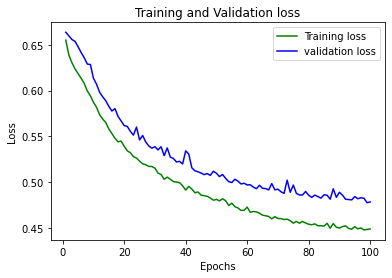

In [191]:
loss_train = history.history['loss']
loss_val = history.history['val_loss']
epochs = range(1,101)
plt.plot(epochs, loss_train, 'g', label='Training loss')
plt.plot(epochs, loss_val, 'b', label='validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

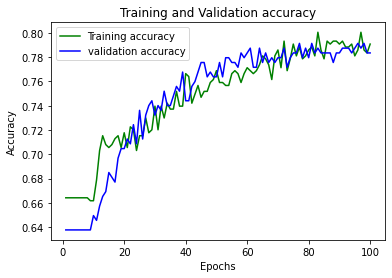

In [192]:
loss_train = history.history['accuracy']
loss_val = history.history['val_accuracy']
epochs = range(1,101)
plt.plot(epochs, loss_train, 'g', label='Training accuracy')
plt.plot(epochs, loss_val, 'b', label='validation accuracy')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [193]:
#Answer Part B: The accuracy dropped from 78.74% to 74.02% when the hyper-parameters are changed.

In [194]:
#(Part C) Make Epoch versus train set accuracy, and validation set accuracy (3 marks)

In [195]:
# Highest accuracy of  Epoch is : 79.34% 

In [196]:
# Evaluate the model for train set
scores = model.evaluate(X_train, Y_train)
print ("Accuracy: %.2f%%" %(scores[1]*100))

13/13 [==============================] - 0s 2ms/step - loss: 0.4446 - accuracy: 0.8029
Accuracy: 80.29%


In [197]:
# Evaluate the model for valid set
scores = model.evaluate(X_valid, Y_valid)
print ("Accuracy: %.2f%%" %(scores[1]*100))

4/4 [==============================] - 0s 3ms/step - loss: 0.5046 - accuracy: 0.7184
Accuracy: 71.84%


In [198]:
#Accuracy using the second model with different hyper-parameters.

In [199]:
scores_train1 = model1.evaluate(X_train, Y_train)
print ("Accuracy_train1: %.2f%%" %(scores_train1[1]*100))

13/13 [==============================] - 0s 2ms/step - loss: 0.1612 - accuracy: 0.7591
Accuracy_train1: 75.91%


In [200]:
scores_valid1 = model1.evaluate(X_valid, Y_valid)
print ("Accuracy_valid1: %.2f%%" %(scores_valid1[1]*100))

4/4 [==============================] - 0s 2ms/step - loss: 0.1656 - accuracy: 0.7573
Accuracy_valid1: 75.73%


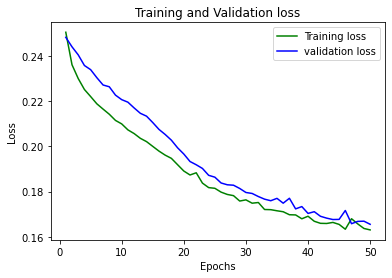

In [201]:
loss_train = history1.history['loss']
loss_val = history1.history['val_loss']
epochs = range(1,51)
plt.plot(epochs, loss_train, 'g', label='Training loss')
plt.plot(epochs, loss_val, 'b', label='validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

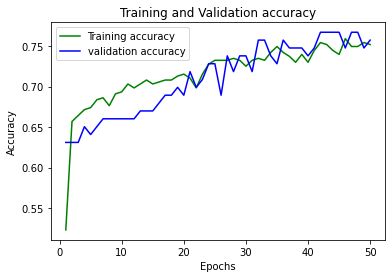

In [202]:
loss_train =history1.history['accuracy']
loss_val = history1.history['val_accuracy']
epochs = range(1,51)
plt.plot(epochs, loss_train, 'g', label='Training accuracy')
plt.plot(epochs, loss_val, 'b', label='validation accuracy')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [203]:
#Answer Part C: Accuracy comparison using  first model Epoch: Train: Valid = 79.34: 78.35: 70.87
# Accuracy comparison using  second model Epoch: Train: Valid = 75.18: 72.26: 70.87

In [204]:
#(Part D) Report results using nice ROC curves, report AUC values.
#Feel free to use code form our course, or from elsewhere (2 marks)

In [205]:
from sklearn.metrics import roc_curve , roc_auc_score , confusion_matrix , accuracy_score
import matplotlib.pyplot as plt

In [206]:
y_pred_keras = model.predict(X_test).ravel()
fpr_keras, tpr_keras, thresholds_keras = roc_curve(Y_test, y_pred_keras)

8/8 [==============================] - 0s 2ms/step


In [207]:
y_pred_keras1 = model1.predict(X_test).ravel()
fpr_keras1, tpr_keras1, thresholds_keras1 = roc_curve(Y_test, y_pred_keras1)

8/8 [==============================] - 0s 3ms/step


In [208]:
y_pred_keras2 = model.predict(X_valid).ravel()
fpr_keras2, tpr_keras2, thresholds_keras2 = roc_curve(Y_valid, y_pred_keras2)


4/4 [==============================] - 0s 3ms/step


In [209]:
y_pred_keras3 = model.predict(X_train).ravel()
fpr_keras3, tpr_keras3, thresholds_keras3 = roc_curve(Y_train, y_pred_keras3)

13/13 [==============================] - 0s 2ms/step


In [210]:
from sklearn.metrics import auc
auc_keras = auc(fpr_keras, tpr_keras)
auc_keras

0.836352657004831

In [211]:
#AUC SCORES

from sklearn.metrics import roc_auc_score

# auc scores
auc_score = roc_auc_score(Y_test, y_pred_keras)
auc_score1 = roc_auc_score(Y_test, y_pred_keras1)

auc_score2 = roc_auc_score(Y_valid, y_pred_keras2)
auc_score3 = roc_auc_score(Y_train, y_pred_keras3)

print(auc_score, auc_score1)
print(auc_score2, auc_score3)

0.836352657004831 0.8381642512077295
0.8089068825910931 0.8558156819026385


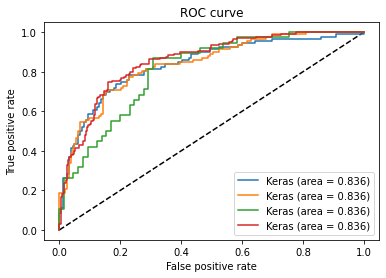

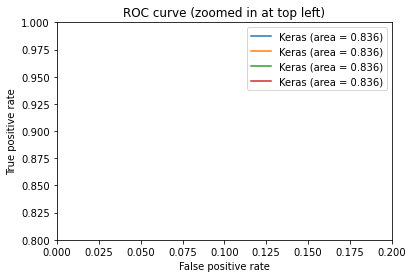

In [212]:
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_keras, tpr_keras, label='Keras (area = {:.3f})'.format(auc_keras))
plt.plot(fpr_keras1, tpr_keras1, label='Keras (area = {:.3f})'.format(auc_keras))
plt.plot(fpr_keras2, tpr_keras2, label='Keras (area = {:.3f})'.format(auc_keras))
plt.plot(fpr_keras3, tpr_keras3, label='Keras (area = {:.3f})'.format(auc_keras))

plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()
# Zoom in view of the upper left corner.
plt.figure(2)
plt.xlim(0, 0.2)
plt.ylim(0.8, 1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_keras, tpr_keras, label='Keras (area = {:.3f})'.format(auc_keras))
plt.plot(fpr_keras1, tpr_keras1, label='Keras (area = {:.3f})'.format(auc_keras))
plt.plot(fpr_keras2, tpr_keras2, label='Keras (area = {:.3f})'.format(auc_keras))
plt.plot(fpr_keras3, tpr_keras3, label='Keras (area = {:.3f})'.format(auc_keras))

plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve (zoomed in at top left)')
plt.legend(loc='best')
plt.show()

In [213]:
# Part E-- We can increase the size of dataset with SMOTE and also another method is by duplicating 
# some data of the existing dataset.
#Below is code for both the methods: 

In [214]:
# SMOTE technique Code:


In [215]:
from sklearn.datasets import make_classification
X, y = make_classification(n_classes=2, class_sep=0.5,
weights=[0.05, 0.95], n_informative=2, n_redundant=0, flip_y=0,
n_features=2, n_clusters_per_class=1, n_samples=1000, random_state=10)

In [216]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X_train, Y_train)

In [217]:
# Build the deep neural network
model3 = Sequential()
model3.add(Dense(10, input_dim=8,  activation='relu'))
model3.add(Dense(6, activation='relu'))
model3.add(Dense(1,  activation='sigmoid'))

In [218]:
###compile
model3.compile(
    optimizer='adam',
    loss='mean_squared_error',
    metrics=['accuracy']
  )

In [219]:
#Fittting and evaluating the model again on the modified data-set
model3.fit(X_res, y_res,epochs=50, batch_size=10)

Epoch 1/50
55/55 [==============================] - 1s 2ms/step - loss: 0.2495 - accuracy: 0.4817
Epoch 2/50
55/55 [==============================] - 0s 2ms/step - loss: 0.2462 - accuracy: 0.5311
Epoch 3/50
55/55 [==============================] - 0s 2ms/step - loss: 0.2433 - accuracy: 0.5348
Epoch 4/50
55/55 [==============================] - 0s 2ms/step - loss: 0.2396 - accuracy: 0.5916
Epoch 5/50
55/55 [==============================] - 0s 2ms/step - loss: 0.2365 - accuracy: 0.5842
Epoch 6/50
55/55 [==============================] - 0s 2ms/step - loss: 0.2337 - accuracy: 0.6300
Epoch 7/50
55/55 [==============================] - 0s 2ms/step - loss: 0.2308 - accuracy: 0.6813
Epoch 8/50
55/55 [==============================] - 0s 2ms/step - loss: 0.2283 - accuracy: 0.7179
Epoch 9/50
55/55 [==============================] - 0s 2ms/step - loss: 0.2254 - accuracy: 0.6612
Epoch 10/50
55/55 [==============================] - 0s 2ms/step - loss: 0.2223 - accuracy: 0.7234
Epoch 11/50
55/55 [

In [220]:
#Accuracy
scores3 = model3.evaluate(X_test, Y_test)
print ("Accuracy: %.2f%%" %(scores3[1]*100))

8/8 [==============================] - 0s 5ms/step - loss: 0.1692 - accuracy: 0.7480
Accuracy: 74.80%


In [221]:
# Second method to increase the dataset is by duplicating the existing data in the dataset. 
#Below is the code:

In [222]:
from imblearn.over_sampling import RandomOverSampler

In [223]:
oversample = RandomOverSampler(sampling_strategy='minority')

In [224]:
# fit and apply the transform
X_over, y_over = oversample.fit_resample(X_train, Y_train)

In [225]:
from collections import Counter
# define dataset
X, y = make_classification(n_samples=10000, weights=[0.99], flip_y=0)
# summarize class distribution
print(Counter(y))
# define oversampling strategy
oversample = RandomOverSampler(sampling_strategy='minority')
# fit and apply the transform
X_over, y_over = oversample.fit_resample(X, y)
# summarize class distribution
print(Counter(y_over))

Counter({0: 9900, 1: 100})
Counter({0: 9900, 1: 9900})


In [226]:
from numpy import mean
from imblearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
steps = [('over', RandomOverSampler()), ('model', DecisionTreeClassifier())]
pipeline = Pipeline(steps=steps)
# evaluate pipeline
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
scores = cross_val_score(pipeline, X, y, scoring='f1_micro', cv=cv, n_jobs=-1)
score = mean(scores)
print('F1 Score: %.3f' % score)

F1 Score: 0.985


In [227]:
#Looks like the accuracy of SMOTE is less than the RandomOverSampler Method.
#The accuracy of SMOTE is 77.95% Whereas RandomOverSampler has 98.4%
#Hence RandomOverSampler is better than SMOTE